In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


# this code detects breast cancer by ML 

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [76]:
df=pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# data preprocessing

In [77]:
df.shape

(569, 32)

In [78]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [79]:
df.duplicated().sum()

0

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [81]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [82]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

# data visualizing

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

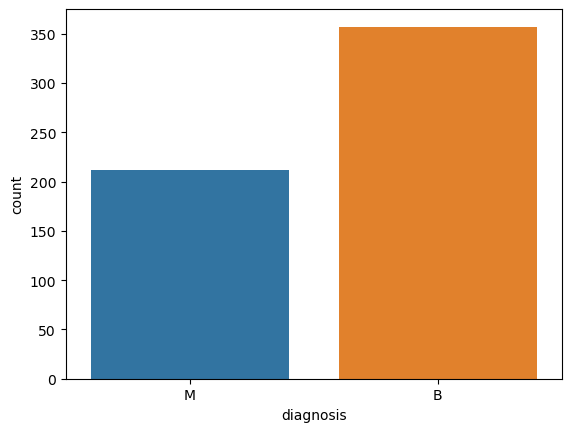

In [83]:
sns.countplot(data=df,x='diagnosis')

In [104]:
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

In [85]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# correlation between data

In [86]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


<AxesSubplot:>

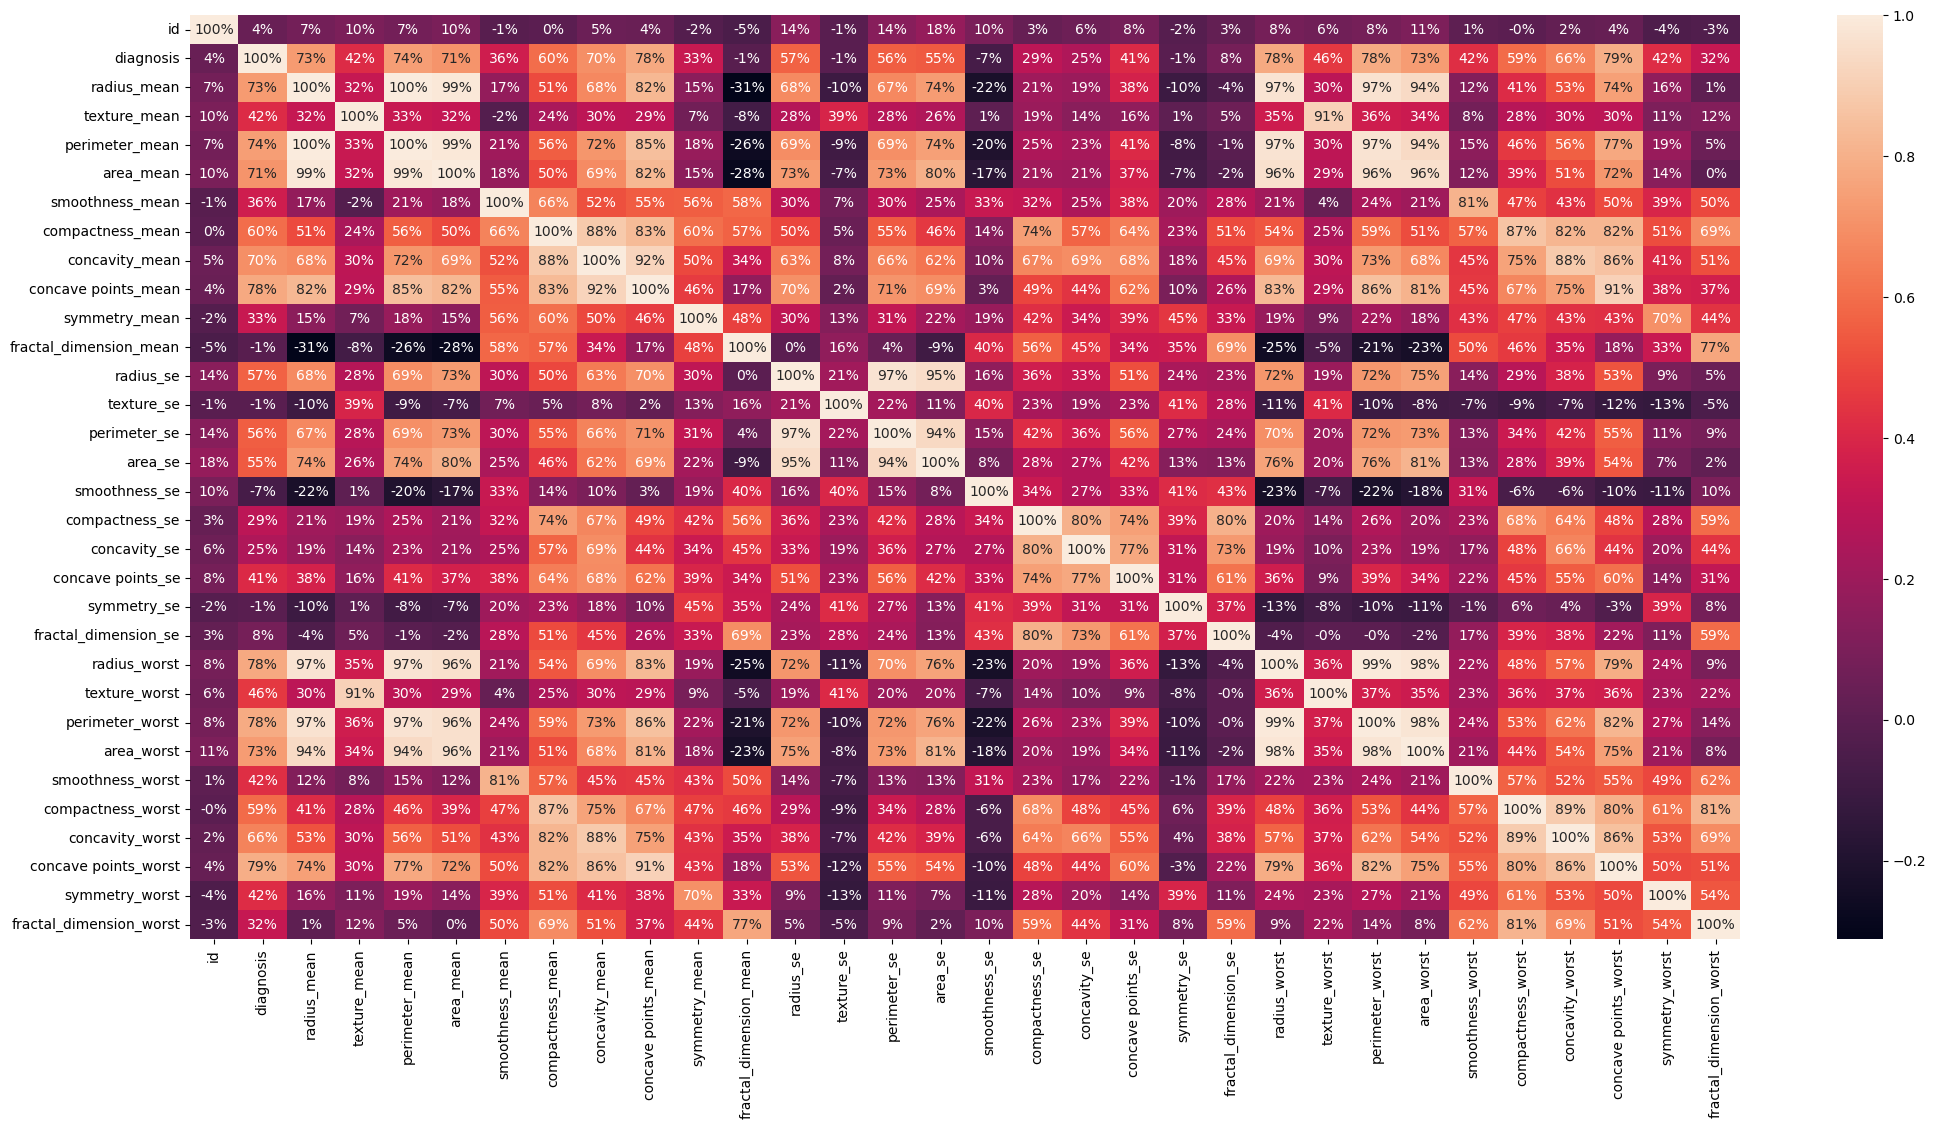

In [103]:
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [88]:
x=df.drop('diagnosis',axis=1)
y=df.diagnosis

# data scaling

In [89]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scale=scale.fit_transform(x)
x_scale

array([[9.14760426e-04, 5.21037437e-01, 2.26580994e-02, ...,
        9.12027491e-01, 5.98462448e-01, 4.18863964e-01],
       [9.14996350e-04, 6.43144493e-01, 2.72573554e-01, ...,
        6.39175258e-01, 2.33589592e-01, 2.22878132e-01],
       [9.24954884e-02, 6.01495575e-01, 3.90260399e-01, ...,
        8.35051546e-01, 4.03705894e-01, 2.13433032e-01],
       ...,
       [1.00765069e-03, 4.55251077e-01, 6.21237741e-01, ...,
        4.87285223e-01, 1.28720678e-01, 1.51908697e-01],
       [1.00796562e-03, 6.44564343e-01, 6.63510315e-01, ...,
        9.10652921e-01, 4.97141731e-01, 4.52315361e-01],
       [9.22636984e-05, 3.68687586e-02, 5.01521813e-01, ...,
        0.00000000e+00, 2.57441356e-01, 1.00682146e-01]])

# split the data to train and test

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=.25,random_state=42)

In [91]:
x_train

array([[2.66648573e-07, 2.79663022e-01, 1.15319581e-01, ...,
        1.84398625e-01, 1.46658782e-01, 9.25488653e-02],
       [9.95291588e-04, 3.03800464e-01, 3.65573216e-01, ...,
        7.04810997e-01, 3.98186477e-01, 3.66391185e-01],
       [9.83218881e-04, 2.82976005e-01, 2.90158945e-01, ...,
        2.27079038e-01, 3.23674354e-01, 1.14325069e-01],
       ...,
       [9.76839177e-03, 3.45922666e-01, 2.40446398e-01, ...,
        1.14536082e-01, 1.76029963e-01, 4.04040404e-02],
       [9.87388694e-04, 3.31250887e-01, 3.35136963e-01, ...,
        6.27835052e-01, 3.18154938e-01, 3.30972058e-01],
       [9.37434334e-04, 2.46059918e-01, 3.65573216e-01, ...,
        2.55360825e-01, 2.22550759e-01, 9.01219992e-02]])

# create a function for the models

# comparing between logistic regression & decision tree and random forest algorithms

In [92]:
def models(x_train,y_train):
    # logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression()
    log.fit(x_train,y_train)
    # decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion="entropy")
    tree.fit(x_train,y_train)
    # randomforest
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=100,criterion="entropy")
    forest.fit(x_train,y_train)
    # print the models accuracy
    print('[0]logistic regression training accuracy',log.score(x_train,y_train))
    print('[1]decision tree training accuracy',tree.score(x_train,y_train))
    print('[2]random forest training accuracy',forest.score(x_train,y_train))
    return log,tree,forest

In [93]:
model=models(x_train,y_train)

[0]logistic regression training accuracy 0.9647887323943662
[1]decision tree training accuracy 1.0
[2]random forest training accuracy 1.0


In [98]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    print('model',i)
    cm=confusion_matrix(y_test,model[i].predict(x_test))
    TP=cm[0][0]
    TN=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]
    print(cm)
    print('testing accuracy=',(TP+TN)/(TP+TN+FP+FN))
    print()


model 0
[[89  0]
 [ 2 52]]
testing accuracy= 0.986013986013986

model 1
[[84  5]
 [ 4 50]]
testing accuracy= 0.9370629370629371

model 2
[[88  1]
 [ 3 51]]
testing accuracy= 0.972027972027972



# another way to get metrics

In [95]:
from sklearn.metrics import classification_report,accuracy_score
for i in range(len(model)):
    print('model',i)
    print(classification_report(y_test,model[i].predict(x_test)))
    print(accuracy_score(y_test,model[i].predict(x_test)))
    print()

model 0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

0.986013986013986

model 1
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        89
           1       0.91      0.93      0.92        54

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

model 2
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted av

# LogisticRegression is the best model for prediction

# comparing between prediction and testing data

In [96]:
pred=model[0].predict(x_test)
print(pred)
print()
y_test.values

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0]



array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])